In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# define random state to be used in every model
RANDOM_STATE = 17

In [3]:
# define path to the data files
PATH_TO_SAMSUNG_DATA = "samsung_HAR/"

In [4]:
#load data to the program
X_train = np.loadtxt(PATH_TO_SAMSUNG_DATA + "samsung_train.txt")
y_train = np.loadtxt(PATH_TO_SAMSUNG_DATA + "samsung_train_labels.txt").astype(int)

X_test = np.loadtxt(PATH_TO_SAMSUNG_DATA + "samsung_test.txt")
y_test = np.loadtxt(PATH_TO_SAMSUNG_DATA + "samsung_test_labels.txt").astype(int)

In [5]:
#check dimension of training and test dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(7352, 561) (7352,)
(2947, 561) (2947,)


# **Instruction** 1:
ในการทำ clustering เราไม่ต้องใช้ target vector ให้รวมข้อมูลจาก training กับ test เข้าด้วยกัน โดยรวม X_train กับ X_test เป็น X และรวม y_train กับ y_test เป็น y


In [6]:
# Your code here  ============================
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

แสดง unique values ที่จะใช้เป็น labels ของ target class.




In [7]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [8]:
n_classes = np.unique(y).size
print (n_classes)

6


ความหมายของ labels เหล่านี้คือ :

1 – walking 2 – walking upstairs 3 – walking downstairs 4 – sitting 5 – standing 6 – laying down

# **Instruction** 2:
ให้ปรับ Scale ของข้อมูลใน X ด้วย  StandardScaler 

In [9]:
# Your code here=================================
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# **Instruction** 3:
ให้ใช้อัลกอริทึม PCA ในการลดขนาดของ dimensions โดยให้เหลือจำนวน components เท่าที่จำเป็น เพื่อที่จะสามารถอธิบายข้อมูลเดิมที่ปรับ scale แล้วให้ได้อย่างน้อย 90% ด้วยการใช้พารามิเตอร์ n_components ใน PCA และให้ใส่ค่า random_state = RANDOM_STATE ด้วย 

In [10]:
# Your code here=================================
pca = PCA(n_components=0.90, random_state=RANDOM_STATE)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# **Instruction** 4:
ให้พิมพ์ค่าจำนวน components ที่ต้องใช้เพื่อให้สามารถอธิบายข้อมูลเดิมที่ปรับ scale แล้วได้ 90% คือเท่าไหร่


(Hint : 56 หรือ 65 หรือ 66 หรือ 193)

In [11]:
#Your code here===============================
print ( "Components = ", pca.n_components_ , "\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  65 
Total explained variance =  0.90048


# **Instruction** 5:

ให้แสดง % ของค่า variance ที่ first main component สามารถอธิบายได้ 


(Hint: ตัวแปร explained_variance_ratio ของ pca)

In [12]:
# Your code here=================================
pca.explained_variance_ratio_

array([0.50738221, 0.06239186, 0.02692564, 0.02452871, 0.01888936,
       0.01631395, 0.01414533, 0.01216211, 0.00985248, 0.00949228,
       0.00858304, 0.0080998 , 0.00765863, 0.00676668, 0.00630242,
       0.00615718, 0.00595335, 0.00577195, 0.00563431, 0.0054083 ,
       0.00518828, 0.00502742, 0.00473229, 0.00463818, 0.00446848,
       0.00439868, 0.00416863, 0.00400809, 0.00389072, 0.00381339,
       0.0036687 , 0.00364357, 0.00349225, 0.00346736, 0.00335539,
       0.00329411, 0.00323824, 0.00300508, 0.00294254, 0.00290452,
       0.00275765, 0.00269864, 0.00264196, 0.0025803 , 0.00255031,
       0.00247776, 0.00245537, 0.0023829 , 0.00235902, 0.00232044,
       0.0022836 , 0.00219182, 0.00212631, 0.00209145, 0.0020348 ,
       0.00201167, 0.00198111, 0.00194391, 0.00192509, 0.00189539,
       0.00186403, 0.00182923, 0.00180956, 0.00176364, 0.00174188])

# **Instruction** 6:
Visualize ข้อมูลที่ถูก plot ใหม่ด้วยสอง components แรก 

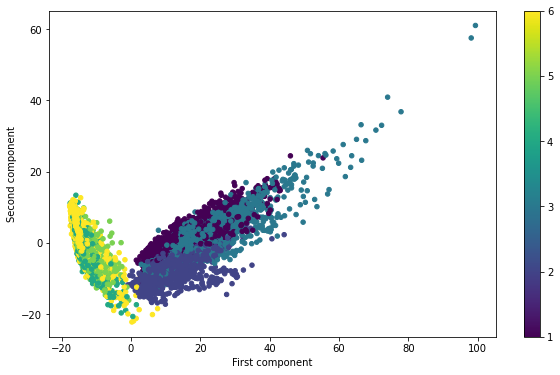

In [13]:
# Your code here==================================================
#1 – walking 2 – walking upstairs 3 – walking downstairs 4 – sitting 5 – standing 6 – laying down
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis')
plt.colorbar()
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()

# **Instruction** 7:
ใช้ Kmenas ในการทำ clustering โดยใช้ข้อมูลที่ลดขนาด dimensions ด้วย PCA แล้ว (ในที่นี้เราพอรู้จากข้อมูลบ้างแล้วว่าจำนวนกิจกรรมที่มีคือ 6 จึงควรแบ่งด้วย n_clusters = 6 แต่ในความเป็นจริงเราไม่รู้ว่าควรจะมีกี่ clusters)

กำหนดให้ใช้พารามิเตอร์ของ Kmeans ดังนี้

*   n_clusters = n_classes (number of unique labels of the target class)
*   n_init = 100
*   random_state = RANDOM_STATE (for the reproducibility of the result)

นอกนั้นใช้ค่า default values.

In [14]:
# Your code here=====================================
kmeans_pca = KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE)
y_km = kmeans_pca.fit_predict(X_pca)

# **Instruction 8:**

Visualize ข้อมูลด้วยสอง components แรก แสดงสีของข้อมูลตามคลัสเตอร์ที่ถูกแบ่ง

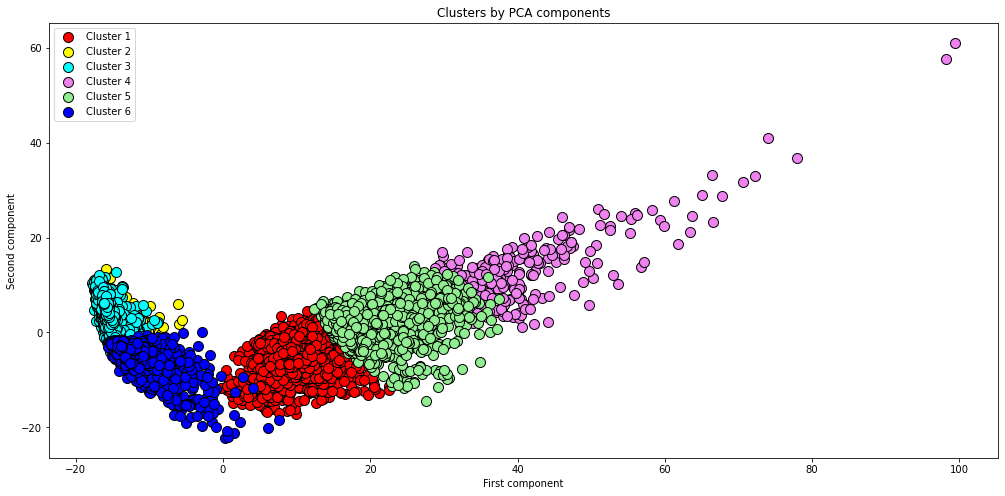

In [15]:
# Your code here===================================
plt.figure(1 , figsize = (17 , 8))
plt.scatter(X_pca[y_km == 0, 0], X_pca[y_km == 0, 1], s = 100, c = 'red', edgecolor='black', label = 'Cluster 1')
plt.scatter(X_pca[y_km == 1, 0], X_pca[y_km == 1, 1], s = 100, c = 'yellow', edgecolor='black', label = 'Cluster 2')
plt.scatter(X_pca[y_km == 2, 0], X_pca[y_km == 2, 1], s = 100, c = 'aqua', edgecolor='black', label = 'Cluster 3')
plt.scatter(X_pca[y_km == 3, 0], X_pca[y_km == 3, 1], s = 100, c = 'violet', edgecolor='black', label = 'Cluster 4')
plt.scatter(X_pca[y_km == 4, 0], X_pca[y_km == 4, 1], s = 100, c = 'lightgreen', edgecolor='black', label = 'Cluster 5')
plt.scatter(X_pca[y_km == 5, 0], X_pca[y_km == 5, 1], s = 100, c = 'blue', edgecolor='black', label = 'Cluster 6')
plt.title('Clusters by PCA components')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend(loc='best')
plt.show()

เปรียบเทียบผลลัพธ์ของการจัดกลุ่มด้วย Kmeans กับ activity จริง ในรูปแบบของตาราง

In [16]:
cluster_labels = kmeans_pca.labels_
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  \
walking                     903         0         0        78       741   
going up the stairs        1241         0         0         5       296   
going down the stairs       320         0         0       196       890   
sitting                       1      1235        91         0         0   
standing                      0      1344         0         0         0   
lying                         5        52      1558         0         0   
all                        2470      2631      1649       279      1927   

                       cluster6    all  
walking                       0   1722  
going up the stairs           2   1544  
going down the stairs         0   1406  
sitting                     450   1777  
standing                    562   1906  
lying                       329   1944  
all                        1343  10299

จะเห็นได้ว่าในแต่ละ activity class ข้อมูลจะถูกระจายอยู่ในหลาย clusters 
ลองหาค่า % สูงสุดของข้อมูลสำหรับแต่ละ activity class ที่ถูกจัดให้อยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่ง เพื่อดูน้ำหนักการกระจายตัวของคลาสไปตาม cluster

ตัวอย่างเช่น ถ้าคลาส "going down the stairs" ซึ่งมีข้อมูลทั้งหมด 1406 ตัว จะกระจายอยู่ในแต่ละคลัสเตอร์เท่าใด สมมติว่าอยู่ใน 


*   cluster 1 จำนวน 900 

*   cluster 3 จำนวน 500


*   cluster 6 จำนวน 6

ดังนั้น %ของข้อมูลสูงสุดที่ถูกจัดให้อยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่งคือ 900/1406 = 0.64


In [17]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values / 
          tab.iloc[:-1,-1].values, index=tab.index[:-1])

walking                  0.524390
going up the stairs      0.803756
going down the stairs    0.633001
sitting                  0.694992
standing                 0.705142
lying                    0.801440
dtype: float64

# **Instruction 9:**
จากผลที่ได้ แสดงว่า Kmeans ไม่ได้แยก activities เป็น 6 กลุ่มได้ดีนัก ให้ลองใช้ elbow method ในการหาจำนวนคลัสเตอร์ที่เหมาะสม แสดงกราฟของ elbow method

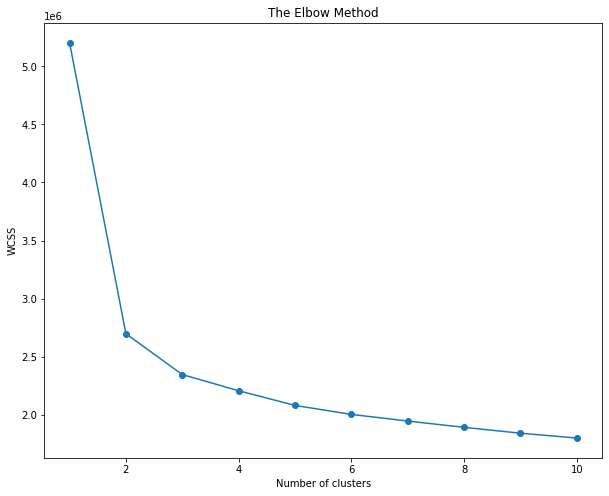

In [18]:
# Your code here================================================
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = RANDOM_STATE).fit(X_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

# **Insttruction 10:**
10.1 รัน Kmeans ใหม่ด้วยจำนวนคลัสเตอร์ที่ได้ โดยใช้พารามิเตอร์ชุดเดิม แต่เปลี่ยนแค่ค่า n_clusters


In [19]:
#จากการทำ elbow method จะได้ k = 3
# Your code here================================================
km = KMeans(n_clusters=3, n_init=100, random_state=RANDOM_STATE)
y_kmeans = km.fit_predict(X_pca)

10.2 plot กราฟการกระจายตัวของข้อมูลที่ได้ พร้อม cluster center

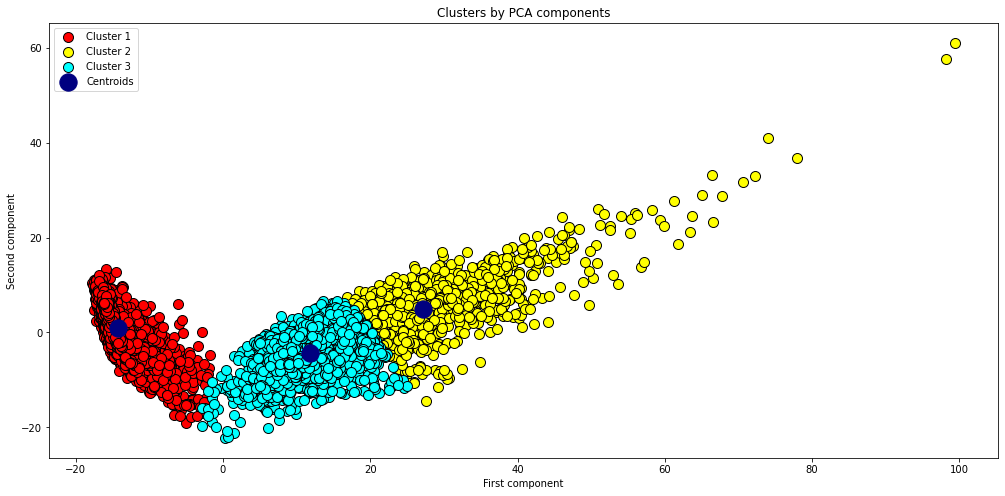

In [20]:
# Your code here================================================
plt.figure(1 , figsize = (17 , 8))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'red', edgecolor='black', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'yellow', edgecolor='black', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'aqua', edgecolor='black', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'navy', label = 'Centroids')
plt.title('Clusters by PCA components')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend(loc='best')
plt.show()

10.3 ให้สรุปลักษณะเด่นของคลัสเตอร์ที่ได้ โดยเขียนเป็น comments ด้านล่างนี้ (จำนวนคลัสเตอร์ ลักษณะเด่นของแต่ละคลัสเตอร์) และวิเคราะห์ผล

คำตอบ: ถูกแบ่งออกเป็นจำนวน 3 คลัสเตอร์ ซึ่งเป็นจำนวนที่ได้มาจากการทำ elbow method โดย
คลัสเตอร์ที่ 1 มีdata point เกาะกลุ่มกันหนาแน่นและมีจำนวนdata pointน้อยกว่าอีก2คลัสเตอร์ที่เหลือ
คลัสเตอร์ที่ 2  data point เกาะกลุ่มหนาแน่นและcluster centerอยู่ตรงกลางของคลัสเตอร์อย่างชัดเจน
คลัสเตอร์ที่ 3 มีบางdata point ที่อยู่ห่างออกไปไกลจากจุดอื่น